# Olist's Metric Design 

In this challenge, we are going to catch a first glimpse into `Olist's business health`

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
# Loading the data
from olist.data import Olist
data = Olist().get_data()

## Test your import!

In [3]:
from nbresult import ChallengeResult

result = ChallengeResult('orders',
    keys_len=len(data),
    key_names=sorted(list(data.keys())),
    reviews_number=len(data['order_reviews'])
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gulecs/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gulecs/code/gulecsec/data-optional-metric-design/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_orders.py::TestOrders::test_key_names PASSED                        [ 33%]
test_orders.py::TestOrders::test_keys_len PASSED                         [ 66%]
test_orders.py::TestOrders::test_reviews_number PASSED                   [100%]

============================== 3 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/orders.pickle

git commit -m 'Completed orders step'

git push origin master



## 1 - Orders vs. Reviews?

❓Plot a histogram of `review_score`. 

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

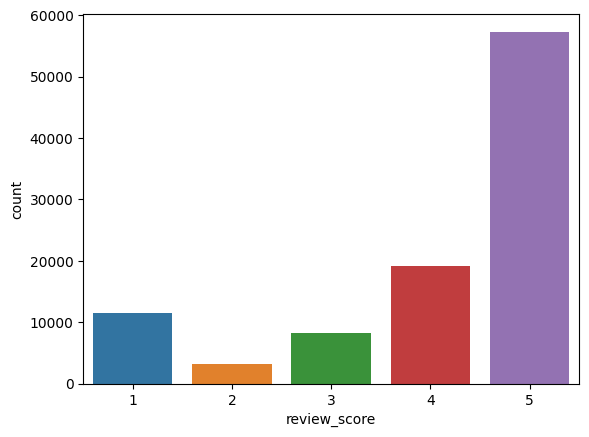

In [4]:
sns.countplot(data['order_reviews']["review_score"]) 

❓ Plot a histogram of `order_status` <br/>

<AxesSubplot:xlabel='count', ylabel='order_status'>

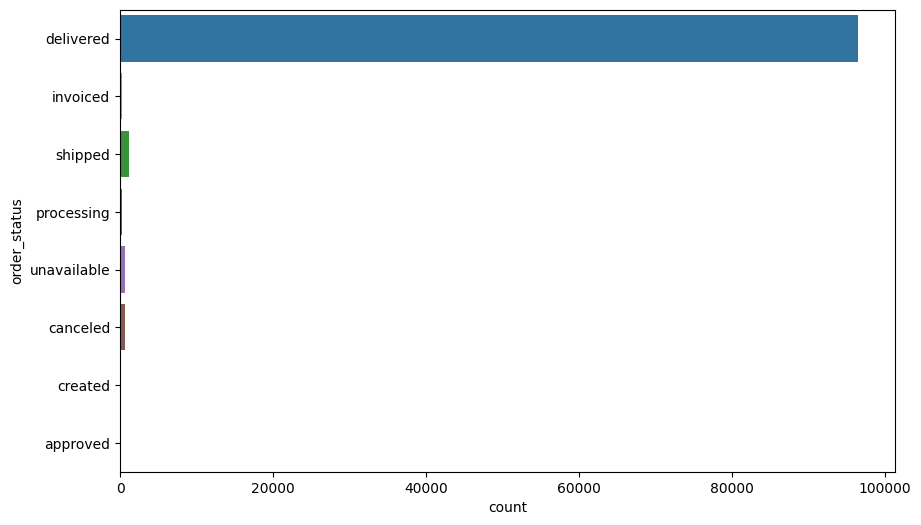

In [57]:
plt.figure(figsize = (10,6))
# sns.set_theme(style="whitegrid")
# sns.histplot(data['orders']["order_status"]) 
# data['orders'].value_counts().plot(kind='bar')
sns.countplot(y=data['orders']["order_status"])

❓ How many of them are delivered ? shipped ? canceled ? ...

In [6]:
data['orders']["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

💡 We already know - from our data schema - that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

<details>
    <summary><i>▸ Hint</i></summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

In [60]:
num_reviews = data["orders"].merge(data["order_reviews"], on="order_id", how = "left")
num_reviews
num_reviews[["order_id",'review_score']].isna().sum()

order_id          0
review_score    768
dtype: int64

If some orders were not reviewed, count and group them per `order_status`.

In [89]:
num_reviews.groupby(["order_status"])["order_estimated_delivery_date"].count() - num_reviews.groupby(["order_status"])["review_id"].count()

order_status
approved         0
canceled        20
created          2
delivered      646
invoiced         5
processing       6
shipped         75
unavailable     14
dtype: int64

In [90]:
## num_reviews.groupby(['order_status'])['review_score'].apply(lambda s: s.isna().sum()).sort_values(ascending = False)

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

1. Which metric would you use as a `key business output metric`for Olist  📈 ? 
2.  Which metric would you use to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric would you use to measure `shipping delay` 🕗?

For each metric, plot a trend line over time.

### Metric 1: Order numbers

❓ Plot the weekly number of total orders per week (to check how business is going)  


In [93]:
# # Orders dataset
# orders = data['orders'].copy()
# # Handle datetime
# orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# orders = orders.set_index('order_purchase_timestamp').sort_index()

In [94]:
# orders.resample('W')['order_id'].count().plot(color='g')
# plt.title('weekly orders (total)')

/var/folders/95/y_36phrx0_128ngk52cfj39h0000gn/T/ipykernel_30240/1999174428.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  num_reviews['Week'] = num_reviews['order_purchase_timestamp'].dt.week


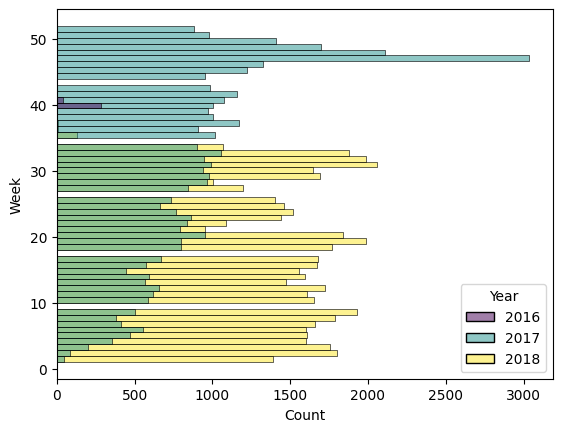

In [97]:
num_reviews['order_purchase_timestamp'] = pd.to_datetime(num_reviews['order_purchase_timestamp'])

num_reviews['Month'] = num_reviews['order_purchase_timestamp'].dt.month
num_reviews['Week'] = num_reviews['order_purchase_timestamp'].dt.week
num_reviews['Year'] = num_reviews['order_purchase_timestamp'].dt.year

sns.histplot(y=num_reviews["Week"], hue= num_reviews["Year"], legend = True, palette = "viridis");

❓ Visualize the weekly number of non-delivered orders (to check for any potential issues)

<details>
    <summary><i>▸ Hint </i></summary>    
    
* Convert dates to Python `datetime` objects  
* You can use the built-in `pandas.Series.resample() tool from `pandas` to group your dataset by weeks
    
</details>

In [173]:
# orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
# plt.title('weekly non-delivered orders')
orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count()

order_purchase_timestamp
2017-02-05    24
2017-02-12    37
2017-02-19    32
2017-02-26    30
2017-03-05    36
              ..
2018-09-23     2
2018-09-30     3
2018-10-07     2
2018-10-14     0
2018-10-21     2
Freq: W-SUN, Name: order_id, Length: 90, dtype: int64

<AxesSubplot:xlabel='Year,Week,order_status'>

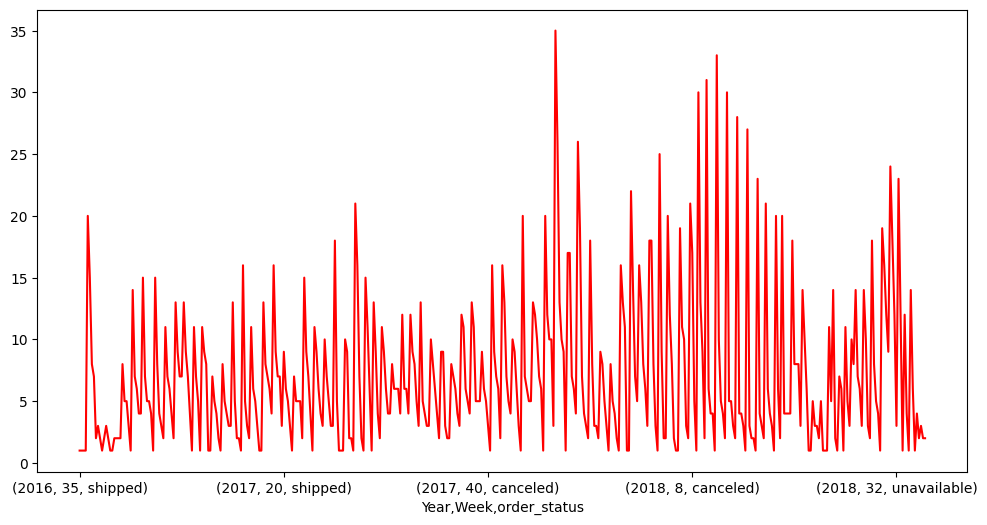

In [208]:
# num_reviews[num_reviews["order_status"] != 'delivered'].groupby(by=["Year", "Week"])["order_status"].value_counts()
plt.figure(figsize = (12,6))
num_reviews[num_reviews["order_status"] != 'delivered'].groupby(by=["Year", "Week"])["order_status"].value_counts().plot(c = "r")

In [202]:
num_reviews[num_reviews["order_status"] != 'delivered']["order_status"].value_counts()

shipped        1118
canceled        629
unavailable     611
invoiced        318
processing      302
created           5
approved          2
Name: order_status, dtype: int64

### Metric 1-bis (optional): Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [221]:
data['order_payments'].head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [224]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)
order_ids_payments.head()

,order_payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [233]:
payments_orders = data["orders"].merge(data["order_payments"],on="order_id", how = "left")

⌛️ Once again, do not forget to handle datetimes properly

In [239]:
# handle datetime
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']: 
    payments_orders[col] = pd.to_datetime(payments_orders[col])
payments_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59


📈 Visualize the number of orders and total amount of payments per week

Text(0.5, 1.0, 'Weekly orders values')

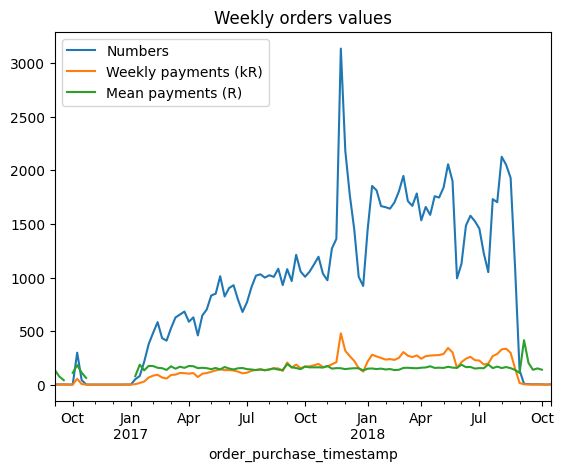

In [248]:
# Set index as "order_purchase_timestamp" per week
weekly_orders_payments = payments_orders.set_index('order_purchase_timestamp').resample('W')

weekly_orders_payments.count()['order_id'].plot(label='Numbers')
weekly_orders_payments.sum()['payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
weekly_orders_payments.mean()['payment_value'].plot(label = 'Mean payments (R)')

plt.legend()
plt.title('Weekly orders values')

📈 *(Optional)* Plot the weekly number of orders and payments again with techniques you learned during the `Data Visualization` module :)

In [14]:
# YOUR CODE HERE

### Metric 2: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? Use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

In [15]:
# YOUR CODE HERE

⌛️ If you need to handle datetime, do it.

In [16]:
# YOUR CODE HERE

📉 Plot the customer satisfaction evolution over time

In [17]:
# YOUR CODE HERE

📉 *(Optional)* Plot the customer satisfaction evolution over time again with techniques you learned during the Data Visualization module :)

In [18]:
# YOUR CODE HERE

### Metric 3: Shipping delay

❓Create two new metrics, `delay_vs_expected` and `wait_time` in ***days***, from the `orders` dataset, and plot their historical evolution on a weekly basis to detect trends

<details>
    <summary>▸ <i>Hint</i></summary>

    
Ask `StackOverflow` to help you compute differences between `datetime`s in Python!
</details>

🛒 Let's focus on delivered orders so that we can compute the shipping delays:

In [19]:
# YOUR CODE HERE

⌛️ Datetime problems again ? Fix them ;)

In [20]:
# YOUR CODE HERE

👉 Compute the delay between the actual delivery date and the ETA for each order.

In [21]:
# YOUR CODE HERE

👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [22]:
# YOUR CODE HERE

⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [23]:
# YOUR CODE HERE

* On average, 8% of the orders are delivered after the ETA ⌛️

* Let's find which weeks were the worst 👇
    1. Aggregate the dataset per week
    2. Compute the percentage of orders delivered lately each week

In [24]:
# YOUR CODE HERE

📈 Plot the `number of delays` and `percentage of delayed orders` per week

In [25]:
# YOUR CODE HERE

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

❓ Create a dataframe (with weeks as indexes ) with the following columns:
* number of delays
* number of orders
* percentage of delayed orders

In [26]:
# YOUR CODE HERE

❓ Create sub-dataframes to seperate these weeks into subgroups.

A suggestion:
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less